# Compare speed and similarity in results for two cross-validation schemes

Cross-validation is important for 1) tuning to determine alpha and lambda parameters in elastic net models, and 2) evaluating performance of optimized models while parameters are fixed.

We wish to perform cross-validation in a manner that will give us the best cost/benefit ratio with respect to computational expense and model quality.

## Prepare inputs

In [1]:
library(CpGWAS)

Let's run these tests over a very small chunk on one chromosome.

In [2]:
args <- list(
    outdir = "../output/",
    chunk1 = 10^6,
    chunk2 = 10^6 + 10,
    snp_data_path = "../../mwas/gwas/libd_chr1.pgen",
    methylation_data_path = "../../mwas/pheno/dlpfc/out/chr1_AA.rda")

Load our `BSseq` object containing bisulfite sequencing data and covariates

In [3]:
load(args$methylation_data_path)

Organize inputs into an object of our class `MethylationInput`

In [4]:
methInput <- new("MethylationInput",
                 BSseq_obj = BSobj2,
                 snp_data_path = args$snp_data_path,
                 args = args)

Dimensions of methylations:  111 2202819 
Dimensions of cov_matrix:  111 5 
Dimensions of pseudoinv:  5 111 


Define window sizes for SNPs to be extracted surrounding each methylation site

In [5]:
window_sizes <- c(1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000)

In [6]:
scaffoldIdentifier_prefix <- paste0(tools::file_path_sans_ext(basename(args$snp_data_path)),
                                    "-",
                                    tools::file_path_sans_ext(basename(args$methylation_data_path)))

## Try triple-nested CV scheme

In [7]:
start_time <- Sys.time() 

In [8]:
scaffoldIdentifier_1 <- paste0(scaffoldIdentifier_prefix, "_scheme1")

In [9]:
scaffold_models_1 <- build_prediction_model(
  BSobj = BSobj2,
  methInput = methInput,
  window_sizes = window_sizes,
  chunk1 = args$chunk1,
  chunk2 = args$chunk2,
  n_fold = 5,
  cv_nesting = "triple",
  scaffoldIdentifier = scaffoldIdentifier_1,
  outdir = args$outdir,
  record_runtime = TRUE
)

df_1 <- convertToDataFrame(scaffold_models_1)

Processing methylation site index:  1000000 
Testing methylation site at position  87818200 
Testing window size:  1000 
Dimensions of SNP matrix:  111 3 

Testing window size:  2000 
Dimensions of SNP matrix:  111 7 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5000 
Dimensions of SNP matrix:  111 15 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 25 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 42 

Testing window size:  50000 
Dimensions of SNP matrix:  111 100 

Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1336 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000001 
Testing methylation site at position  87818244 
Testing window size:  1000 
Dimensions of SNP matrix:  111 3 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  2000 
Dimensions of SNP matrix:  111 6 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5000 
Dimensions of SNP matrix:  111 15 

Testing window size:  10000 
Dimensions of SNP matrix:  111 25 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 42 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  50000 
Dimensions of SNP matrix:  111 99 

Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 

Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1336 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000002 
Testing methylation site at position  87818262 
Testing window size:  1000 
Dimensions of SNP matrix:  111 3 

Testing window size:  2000 
Dimensions of SNP matrix:  111 6 

Testing window size:  5000 
Dimensions of SNP matrix:  111 15 

Testing window size:  10000 
Dimensions of SNP matrix:  111 25 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 42 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  50000 
Dimensions of SNP matrix:  111 100 

Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1336 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000003 
Testing methylation site at position  87818291 
Testing window size:  1000 
Dimensions of SNP matrix:  111 3 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  2000 
Dimensions of SNP matrix:  111 6 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5000 
Dimensions of SNP matrix:  111 15 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 25 

Testing window size:  20000 
Dimensions of SNP matrix:  111 42 

Testing window size:  50000 
Dimensions of SNP matrix:  111 99 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1336 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000004 
Testing methylation site at position  87818777 
Testing window size:  1000 
Dimensions of SNP matrix:  111 2 

Testing window size:  2000 
Dimensions of SNP matrix:  111 5 

Testing window size:  5000 
Dimensions of SNP matrix:  111 13 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 26 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 42 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  50000 
Dimensions of SNP matrix:  111 102 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  1e+05 
Dimensions of SNP matrix:  111 236 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 592 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1336 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000005 
Testing methylation site at position  87818847 
Testing window size:  1000 
Dimensions of SNP matrix:  111 2 

Testing window size:  2000 
Dimensions of SNP matrix:  111 5 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5000 
Dimensions of SNP matrix:  111 13 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 26 

Testing window size:  20000 
Dimensions of SNP matrix:  111 42 

Testing window size:  50000 
Dimensions of SNP matrix:  111 101 

Testing window size:  1e+05 
Dimensions of SNP matrix:  111 236 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 592 

Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1336 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000006 
Testing methylation site at position  87819360 
Testing window size:  1000 
Dimensions of SNP matrix:  111 3 

Testing window size:  2000 
Dimensions of SNP matrix:  111 3 

Testing window size:  5000 
Dimensions of SNP matrix:  111 13 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 26 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 42 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  50000 
Dimensions of SNP matrix:  111 101 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  1e+05 
Dimensions of SNP matrix:  111 236 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  2e+05 
Dimensions of SNP matrix:  111 593 

Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1337 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000007 
Testing methylation site at position  87819622 
Testing window size:  1000 
Dimensions of SNP matrix:  111 2 

Testing window size:  2000 
Dimensions of SNP matrix:  111 3 

Testing window size:  5000 
Dimensions of SNP matrix:  111 13 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 26 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 41 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message:
“from glmnet C++ code (error code -100); Convergence for 100th lambda value not reached after maxit=100000 iterations; solutions for larger lambdas returned”



Testing window size:  50000 
Dimensions of SNP matrix:  111 101 

Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 593 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1338 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000008 
Testing methylation site at position  87819799 
Testing window size:  1000 
Dimensions of SNP matrix:  
For site at position 87819799, no SNPs were found in the window of size 1000
Testing window size:  2000 
Dimensions of SNP matrix:  111 4 

Testing window size:  5000 
Dimensions of SNP matrix:  111 13 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 25 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 41 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  50000 
Dimensions of SNP matrix:  111 101 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1338 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000009 
Testing methylation site at position  87819982 
Testing window size:  1000 
Dimensions of SNP matrix:  
For site at position 87819982, no SNPs were found in the window of size 1000
Testing window size:  2000 
Dimensions of SNP matrix:  111 4 

Testing window size:  5000 
Dimensions of SNP matrix:  111 13 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 23 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 41 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  50000 
Dimensions of SNP matrix:  111 101 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1337 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Processing methylation site index:  1000010 
Testing methylation site at position  87820227 
Testing window size:  1000 
Dimensions of SNP matrix:  
For site at position 87820227, no SNPs were found in the window of size 1000
Testing window size:  2000 
Dimensions of SNP matrix:  111 5 

Testing window size:  5000 
Dimensions of SNP matrix:  111 12 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  10000 
Dimensions of SNP matrix:  111 23 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  20000 
Dimensions of SNP matrix:  111 40 

Testing window size:  50000 
Dimensions of SNP matrix:  111 100 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  1e+05 
Dimensions of SNP matrix:  111 234 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”



Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1337 


Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”
Warning message in cor(predictions, yhat_test):
“the standard deviation is zero”


MethylationScaff object saved to ../output//libd_chr1-chr1_AA_scheme1.rds



In [10]:
df_1

,scaffoldIdentifier,methylationPosition,windowSize,nSNPs,cor,mse,alpha,lambda,runtime
,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cor,libd_chr1-chr1_AA_scheme1,87818200,1e+03,3,0.05811582,0.001204599,0.0,3.42100197,0.8471191
cor1,libd_chr1-chr1_AA_scheme1,87818200,2e+03,7,0.09706483,0.001204267,0.0,5.15138270,0.7063329
cor2,libd_chr1-chr1_AA_scheme1,87818200,5e+03,15,0.19280609,0.001203523,0.0,5.15138270,1.4051371
cor3,libd_chr1-chr1_AA_scheme1,87818200,1e+04,25,NA,0.001204809,0.1,0.09023399,0.9360950
cor4,libd_chr1-chr1_AA_scheme1,87818200,2e+04,42,0.26418881,0.001201189,0.0,9.02339933,4.8685620
cor5,libd_chr1-chr1_AA_scheme1,87818200,5e+04,100,0.43693084,0.001193544,0.0,9.02339933,3.1526499
cor6,libd_chr1-chr1_AA_scheme1,87818200,1e+05,235,0.19516417,0.001204809,0.1,0.11940134,5.2693400
cor7,libd_chr1-chr1_AA_scheme1,87818200,2e+05,591,0.53459738,0.001143726,0.0,14.56712409,2.8303020
cor8,libd_chr1-chr1_AA_scheme1,87818200,5e+05,1336,-0.32309257,0.001204809,0.1,0.14828041,3.4706271


In [12]:
end_time <- Sys.time()  # End time capture
total_runtime <- end_time - start_time
total_runtime_seconds <- as.numeric(total_runtime, units = "secs")
hours <- total_runtime_seconds %/% 3600
minutes <- (total_runtime_seconds %% 3600) %/% 60
seconds <- total_runtime_seconds %% 60

# Report the runtime
cat(sprintf("Processed chunks %d through %d in %d hours, %d minutes and %d seconds.\n",
            args$chunk1, args$chunk2, as.integer(hours), as.integer(minutes), as.integer(seconds)))

Processed chunks 1000000 through 1000010 in 0 hours, 4 minutes and 2 seconds.


## Try double-nested, two-step CV scheme

In [13]:
start_time <- Sys.time() 

In [14]:
scaffoldIdentifier_2 <- paste0(scaffoldIdentifier_prefix, "_scheme2")

In [15]:
scaffold_models_2 <- build_prediction_model(
  BSobj = BSobj2,
  methInput = methInput,
  window_sizes = window_sizes,
  chunk1 = args$chunk1,
  chunk2 = args$chunk2,
  n_fold = 5,
  cv_nesting = "double",
  scaffoldIdentifier = scaffoldIdentifier_2,
  outdir = args$outdir,
  record_runtime = TRUE
)

df_2 <- convertToDataFrame(scaffold_models_2)

Processing methylation site index:  1000000 
Testing methylation site at position  87818200 
Testing window size:  1000 
Dimensions of SNP matrix:  111 3 

Testing window size:  2000 
Dimensions of SNP matrix:  111 7 

Testing window size:  5000 
Dimensions of SNP matrix:  111 15 

Testing window size:  10000 
Dimensions of SNP matrix:  111 25 

Testing window size:  20000 
Dimensions of SNP matrix:  111 42 

Testing window size:  50000 
Dimensions of SNP matrix:  111 100 

Testing window size:  1e+05 
Dimensions of SNP matrix:  111 235 

Testing window size:  2e+05 
Dimensions of SNP matrix:  111 591 

Testing window size:  5e+05 
Dimensions of SNP matrix:  111 1336 

Processing methylation site index:  1000001 
Testing methylation site at position  87818244 
Testing window size:  1000 
Dimensions of SNP matrix:  111 3 

Testing window size:  2000 
Dimensions of SNP matrix:  111 6 

Testing window size:  5000 
Dimensions of SNP matrix:  111 15 

Testing window size:  10000 
Dimensions

MethylationScaff object saved to ../output//libd_chr1-chr1_AA_scheme2.rds



In [16]:
end_time <- Sys.time()  # End time capture
total_runtime <- end_time - start_time
total_runtime_seconds <- as.numeric(total_runtime, units = "secs")
hours <- total_runtime_seconds %/% 3600
minutes <- (total_runtime_seconds %% 3600) %/% 60
seconds <- total_runtime_seconds %% 60

# Report the runtime
cat(sprintf("Processed chunks %d through %d in %d hours, %d minutes and %d seconds.\n",
            args$chunk1, args$chunk2, as.integer(hours), as.integer(minutes), as.integer(seconds)))

Processed chunks 1000000 through 1000010 in 0 hours, 1 minutes and 8 seconds.


## Compare results across two scheme

In [25]:
df_1 <- convertToDataFrame(scaffold_models_1)
df_2 <- convertToDataFrame(scaffold_models_2)

In [28]:
dim(df_1)
dim(df_2)

[1] 96  8

[1] 96  8

In [26]:
df_1$scaffoldIdentifier <- df_2$scaffoldIdentifier <- NULL

In [27]:
identical(df_1, df_2)

[1] FALSE

Make sure orders of samples are the same

In [36]:
df_1_metadata <- df_1[,1:3]
df_2_metadata <- df_2[,1:3]

In [37]:
identical(df_1_metadata, df_2_metadata)

[1] TRUE

Compare correlations between predicted and observed values, across the two nesting schema

In [47]:
library(ggplot2)
library(ggpubr)

# Merge the two data frames (assuming they have the same number of rows)
combined_df <- data.frame(triple_nesting = df_1$cor, double_nesting = df_2$cor)

In [48]:
combined_df

triple_nesting,double_nesting
<dbl>,<dbl>
0.05811582,0.1365585
0.09706483,0.2152592
0.19280609,0.2197099
NA,0.2538043
0.26418881,0.2768170
0.43693084,0.3435623
0.19516417,0.3834200
0.53459738,0.4796146
-0.32309257,0.5686094


Note: We're left with dropout (no terms kept in model) much more often with triple than double-nested scheme?

In [44]:
combined_df <- na.omit(combined_df))

[1] 73  2

In [46]:
combined_df

,triple_nesting,double_nesting
,<dbl>,<dbl>
1,0.05811582,0.1365585
2,0.09706483,0.2152592
3,0.19280609,0.2197099
5,0.26418881,0.2768170
6,0.43693084,0.3435623
7,0.19516417,0.3834200
8,0.53459738,0.4796146
9,-0.32309257,0.5686094
10,0.06575757,0.1371217


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 23 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 23 rows containing non-finite values (`stat_regline_equation()`).”
Warning message:
“Removed 23 rows containing missing values (`geom_point()`).”


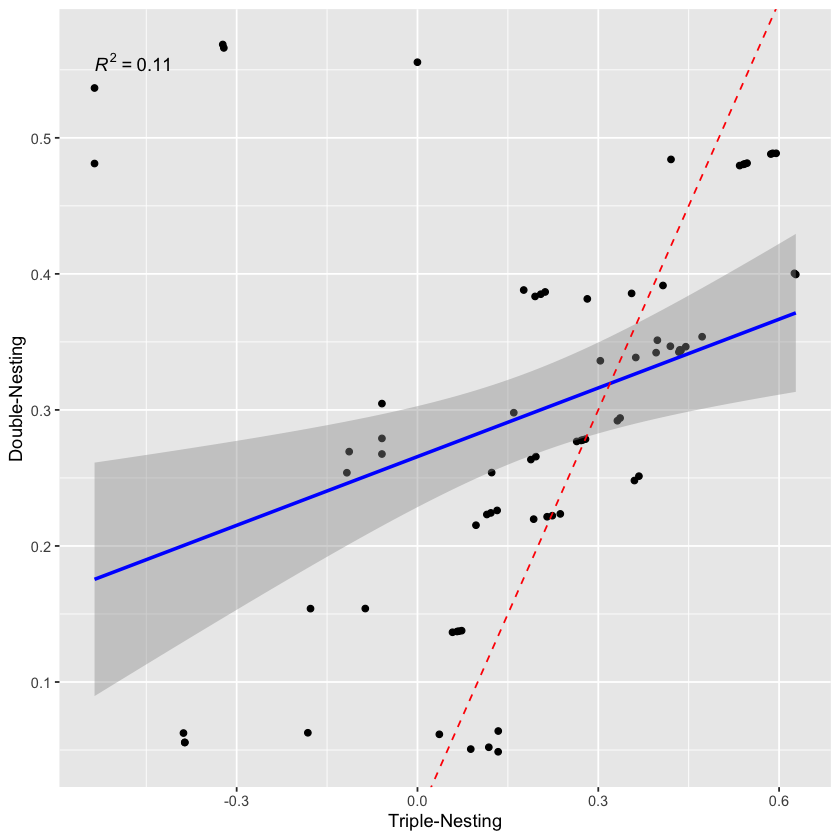

In [49]:
# Convert columns to numeric if they are not already
combined_df$triple_nesting <- as.numeric(as.character(combined_df$triple_nesting))
combined_df$double_nesting <- as.numeric(as.character(combined_df$double_nesting))

# Create the scatter plot
ggplot(combined_df, aes(x = triple_nesting, y = double_nesting)) +
  geom_point() +  # Add points
  geom_smooth(method = "lm", se = TRUE, color = "blue") +  # Add regression line and CI
  geom_abline(intercept = 0, slope = 1, linetype = "dashed", color = "red") +  # Diagonal line
  stat_regline_equation(aes(label = ..rr.label..), label.x.npc = "left") +  # Add R²
  labs(x = "Triple-Nesting", y = "Double-Nesting")  # Axis titles


In [51]:
mean(na.omit(combined_df$triple_nesting))

[1] 0.1851397

In [52]:
mean(na.omit(combined_df$double_nesting))

[1] 0.3178793

## Evaluate overall performance

For each methylation site, only keep the test for the `window_size` giving the greatest R^2

In [57]:
library(dplyr)

# Assuming your data frame is named df
result_df_1 <- df_1 %>%
  group_by(methylationPosition) %>%
  filter(cor == max(cor, na.rm = TRUE))

# View the resulting data frame
print(result_df_1)


# A tibble: 11 × 8
# Groups:   methylationPosition [11]
   methylationPosition windowSize nSNPs   cor     mse alpha lambda runtime
                 <int>      <dbl> <int> <dbl>   <dbl> <dbl>  <dbl>   <dbl>
 1            87818200     200000   591 0.535 0.00114     0   14.6    2.83
 2            87818244     200000   591 0.541 0.00120     0   14.8    2.80
 3            87818262     200000   591 0.543 0.00122     0   14.9    2.72
 4            87818291     200000   591 0.547 0.00126     0   15.1    2.69
 5            87818777     100000   236 0.628 0.00190     0   13.6    5.02
 6            87818847     100000   236 0.625 0.00196     0   13.7    5.07
 7            87819360     200000   593 0.595 0.00205     0   18.1    2.95
 8            87819622     200000   593 0.421 0.00182     0   18.2    2.83
 9            87819799      50000   101 0.396 0.00159     0   12.3    3.29
10            87819982      50000   101 0.362 0.00136     0   11.7    3.15
11            87820227      50000   100 0.30

In [62]:
mean(result_df_1$cor)

[1] 0.4996312

In [60]:
# Assuming your data frame is named df
result_df_2 <- df_2 %>%
  group_by(methylationPosition) %>%
  filter(cor == max(cor, na.rm = TRUE))

# View the resulting data frame
print(result_df_2)

# A tibble: 11 × 8
# Groups:   methylationPosition [11]
   methylationPosition windowSize nSNPs   cor     mse alpha lambda  runtime
                 <int>      <dbl> <int> <dbl>   <dbl> <dbl>  <dbl>    <dbl>
 1            87818200     500000  1336 0.569 0.00161     0   15.0 0.000813
 2            87818244     500000  1336 0.567 0.00166     0   15.3 0.000883
 3            87818262     500000  1336 0.567 0.00168     0   15.4 0.000903
 4            87818291     500000  1336 0.566 0.00171     0   15.6 0.000921
 5            87818777     500000  1336 0.557 0.00222     0   17.8 0.000908
 6            87818847     500000  1336 0.556 0.00227     0   17.9 0.000902
 7            87819360     500000  1337 0.548 0.00239     0   18.0 0.000905
 8            87819622     500000  1338 0.542 0.00221     0   16.8 0.000871
 9            87819799     500000  1338 0.537 0.00205     0   15.6 0.000908
10            87819982     500000  1337 0.533 0.00190     0   14.2 0.000900
11            87820227     50000

Note: For this sample subset, alpha := 0, meaning elastic net always results in pure ridge regression

In [63]:
mean(result_df_2$cor)

[1] 0.5524135